<a href="https://colab.research.google.com/github/Spartz1/Data-science-analysis/blob/main/London_weather_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import plotly.express as px
import plotly.graph_objects as go

In [2]:
lw_data = pd.read_csv('london_weather.csv')

In [3]:
lw_data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
print(lw_data.shape)
lw_data.info()

(15341, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [5]:
lw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
date,15341.0,1.999567e+07,121217.558277,19790101.0,19890702.0,20000101.0,20100702.0,20201231.0
cloud_cover,15322.0,5.268242e+00,2.070072,0.0,4.0,6.0,7.0,9.0
sunshine,15341.0,4.350238e+00,4.028339,0.0,0.5,3.5,7.2,16.0
global_radiation,15322.0,1.187570e+02,88.898272,8.0,41.0,95.0,186.0,402.0
max_temp,15335.0,1.538878e+01,6.554754,-6.2,10.5,15.0,20.3,37.9
mean_temp,15305.0,1.147551e+01,5.729709,-7.6,7.0,11.4,16.0,29.0
min_temp,15339.0,7.559867e+00,5.326756,-11.8,3.5,7.8,11.8,22.3
precipitation,15335.0,1.668634e+00,3.738540,0.0,0.0,0.0,1.6,61.8
pressure,15337.0,1.015366e+05,1049.722604,95960.0,100920.0,101620.0,102240.0,104820.0
snow_depth,13900.0,3.798561e-02,0.545633,0.0,0.0,0.0,0.0,22.0


In [6]:
lw_data['year'] = lw_data['date'].astype(str).str[:4]
lw_data['month'] = lw_data['date'].astype(str).str[4:6]
lw_data['date'] = lw_data['date'].astype(str).str[6:]

In [7]:
lw_data[['date', 'month', 'year']] = lw_data[['date', 'month', 'year']].astype(int)

In [8]:
lw_data.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
year                   0
month                  0
dtype: int64

In [9]:
weather_features = lw_data.select_dtypes(exclude = 'object').columns

In [10]:
for x in weather_features:
  print(x, len(lw_data[x].unique()))

date 31
cloud_cover 11
sunshine 160
global_radiation 361
max_temp 375
mean_temp 322
min_temp 297
precipitation 263
pressure 643
snow_depth 20
year 42
month 12


In [11]:
lw_data['cloud_cover'] = lw_data['cloud_cover'].fillna(9.0)

In [12]:
sorted(lw_data['cloud_cover'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [13]:
lw_cloudy = dict()

In [14]:
lw_cloudy['Barely cloudy'] = lw_data['cloud_cover'][lw_data['cloud_cover'].isin([0,1,2])].count()
lw_cloudy['Partly cloudy'] = lw_data['cloud_cover'][lw_data['cloud_cover'].isin([3,4,5])].count()
lw_cloudy['Mostly cloudy'] = lw_data['cloud_cover'][lw_data['cloud_cover'].isin([6,7,8])].count()
lw_cloudy['Obstructed view'] = lw_data['cloud_cover'][lw_data['cloud_cover'] == 9].count()

In [20]:
fig = px.pie(values=list(lw_cloudy.values()), names=list(lw_cloudy.keys()), 
              title = "London's Cloud Cover Status",
              color_discrete_sequence=px.colors.sequential.dense)
fig.update_layout(legend_title_text = 'Cloud status', 
                  font = dict(
                      size = 14
                      ))
fig.show()

In [21]:
lw_data['snow_depth'].unique()

array([ 9.,  8.,  4.,  2.,  1.,  0.,  6.,  7., 22., 20., 16., 18., 15.,
       13., 11., 10.,  3.,  5., 12., nan])

In [22]:
lw_data1 = lw_data.groupby(['year', 'month'], as_index = False)[weather_features].mean()

In [23]:
lw_data1['snow_depth'] = lw_data1.snow_depth.fillna(0)

In [24]:
lw_data1.drop(index = 0, inplace = True)

In [25]:
lw_data1['date'] = pd.to_datetime(lw_data1[['year', 'month']].assign(DAY = 1))

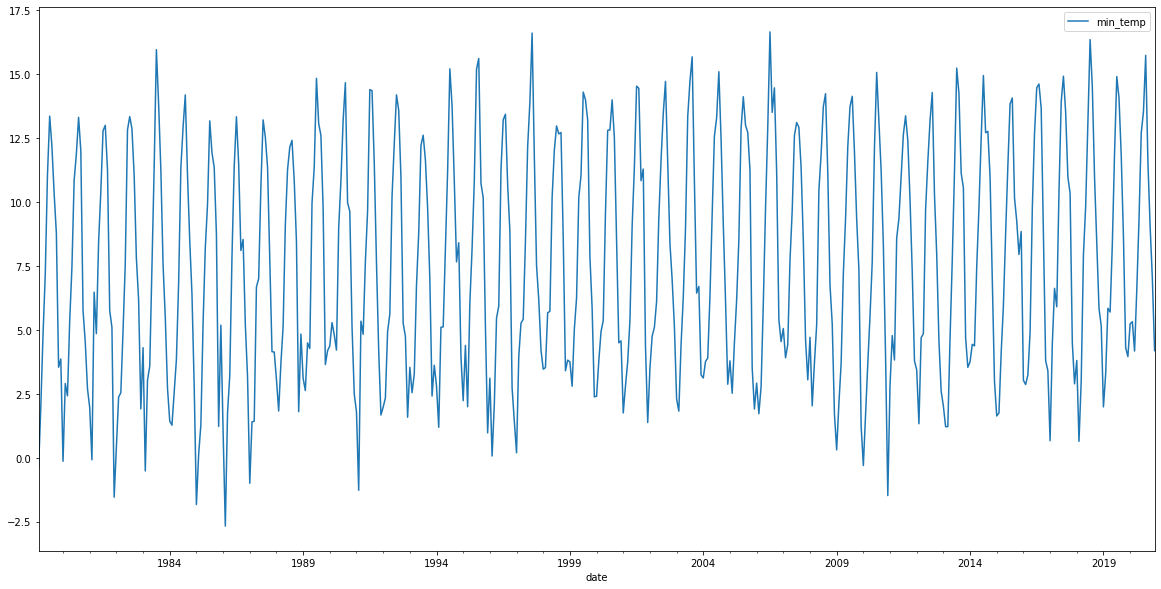

In [26]:
lw_data1.plot(x = 'date', y = ['min_temp'], kind = 'line', figsize = (20,10))
plt.show()

In [289]:
fig = px.scatter(lw_data1, x="year", y="month", color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
	         size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth in London (1979-2020)")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.show()

In [42]:
lw_data3 = lw_data1.groupby(['year'], as_index = False)[['max_temp', 'mean_temp', 'min_temp', 'global_radiation']].mean()

In [185]:
layout = go.Layout(
    title = "London's temperature",
    plot_bgcolor = "#FFF",
    hovermode = "x",
    hoverdistance = 100,
    spikedistance = 1000,
    xaxis=dict(
        title = "Years",
        linecolor = "dimgray",
        showgrid = False,
        showspikes = True,
        spikethickness = 1,
        spikedash = 'dash',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        mirror = True
    ),
    yaxis=dict(
        title = "Temperature",  
        linecolor = "dimgray",
        mirror = True
    )
)

plot = go.Figure(data = [go.Scatter(
    x = lw_data3.year,
    y = lw_data3.max_temp,
    name = 'Max',
    mode = 'lines+markers',
    line_color = 'orange'),
    go.Scatter(
    x = lw_data3.year,
    y = lw_data3.mean_temp,
    name = 'Mean',
    mode = 'lines+markers',
    line = dict(color = 'silver', dash = 'longdash')),
    go.Scatter(
    x = lw_data3.year,
    y = lw_data3.min_temp,
    name = 'Min',
    mode = 'lines+markers',
    line_color = 'lightblue')
    ],
    layout = layout)
plot.show()

In [198]:
layout = go.Layout(
    title = "London's Global Radiation",
    plot_bgcolor = '#fff',
    hovermode = 'x',
    xaxis = dict(
        title = 'Years',
        linecolor = 'dimgrey',
        showgrid = False,
        showspikes = True,
        spikedash = 'dot',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        spikethickness = 1,
        mirror = True
    ),
    yaxis = dict(
        title = 'Radiation (W/m2)',
        linecolor = 'dimgrey',
        showgrid = False,
        mirror = True
    )
)

plot = go.Figure(data = [go.Scatter(
    x = lw_data3.year,
    y = lw_data3.global_radiation,
    mode = 'lines+markers',
    marker = dict(color = lw_data3.global_radiation, colorscale = 'ylorrd', size = 10),
    line_color = 'lightgrey')],
    layout = layout)
plot.show()